In [6]:
# Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [7]:
import seaborn as sns
sns.set()


In [8]:
from sklearn.linear_model import LinearRegression


In [9]:
import statsmodels.api as sm
import pickle
pd.options.display.float_format = '{:.2f}'.format
from sklearn.preprocessing import FunctionTransformer

In [10]:
# Import data
data_1 = pd.read_csv('zillow_listing_cleaned.csv')

### Explore Data

In [11]:
data_1.describe(include='all')

,prices,address,zip code,beds,baths,sqft,type
count,1346.00,1346,1346,1346.00,1346.00,1346.00,1346
unique,NaN,176,32,NaN,NaN,NaN,4
top,NaN,529 SW Schubert Pl NW Calgary AB T3L 1X3,T3N,NaN,NaN,NaN,House
freq,NaN,131,265,NaN,NaN,NaN,1165
mean,526936.90,NaN,NaN,3.44,3.18,1749.08,NaN
std,138395.61,NaN,NaN,0.88,0.71,322.99,NaN
min,110000.00,NaN,NaN,1.00,1.00,433.00,NaN
25%,469900.00,NaN,NaN,3.00,3.00,1470.00,NaN
50%,539900.00,NaN,NaN,3.00,3.00,1821.00,NaN
75%,599000.00,NaN,NaN,4.00,4.00,1873.00,NaN


In [12]:
data_1['idx'] = data_1.groupby(['zip code']).ngroup()
data_1['idy'] = data_1.groupby(['type']).ngroup()
data_1

,prices,address,zip code,beds,baths,sqft,type,idx,idy
0,2995000,548 Willow Brook Dr S Calgary AB T2J 1N7,T2J,6,6,4688,House,6,2
1,1999999,18 S Spring Glen Vw SW Calgary AB T3H 6A1,T3H,6,6,4438,House,24,2
2,1749000,85 N Slopes Poin SW Calgary AB T3H 3Y8,T3H,4,3,2533,House,24,2
3,1675000,2027 N 49th Ave SW Calgary AB T2T 2V5,T2T,5,4,2631,House,14,2
4,1399900,64 E Cranarch Hts SE Calgary AB T3M 0V6,T3M,3,4,2091,House,28,2
...,...,...,...,...,...,...,...,...,...
1341,212500,123 N Mount Selkirk Clos SE Calgary AB T2Z 2R5,T2Z,1,1,1851,House,18,2
1342,210000,221 N 6th Ave SE #511 Calgary AB T2G 4Z9,T2G,1,1,700,Apartment,5,0
1343,187900,2111 E 14th St SW #202 Calgary AB T2T 3T2,T2T,2,1,753,Apartment,14,0
1344,169900,6224 S 17th Ave SE #1414 Calgary AB T2A 7X8,T2A,2,1,843,Apartment,1,0


In [13]:
data_1.isnull().sum()

prices      0
address     0
zip code    0
beds        0
baths       0
sqft        0
type        0
idx         0
idy         0
dtype: int64

C:\Users\saadi\AppData\Local\Temp\ipykernel_9168\1675820058.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_1['prices'])


<Axes: xlabel='prices', ylabel='Density'>

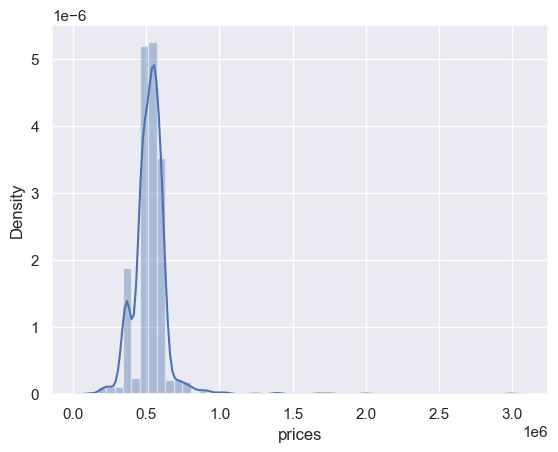

In [14]:
sns.distplot(data_1['prices'])

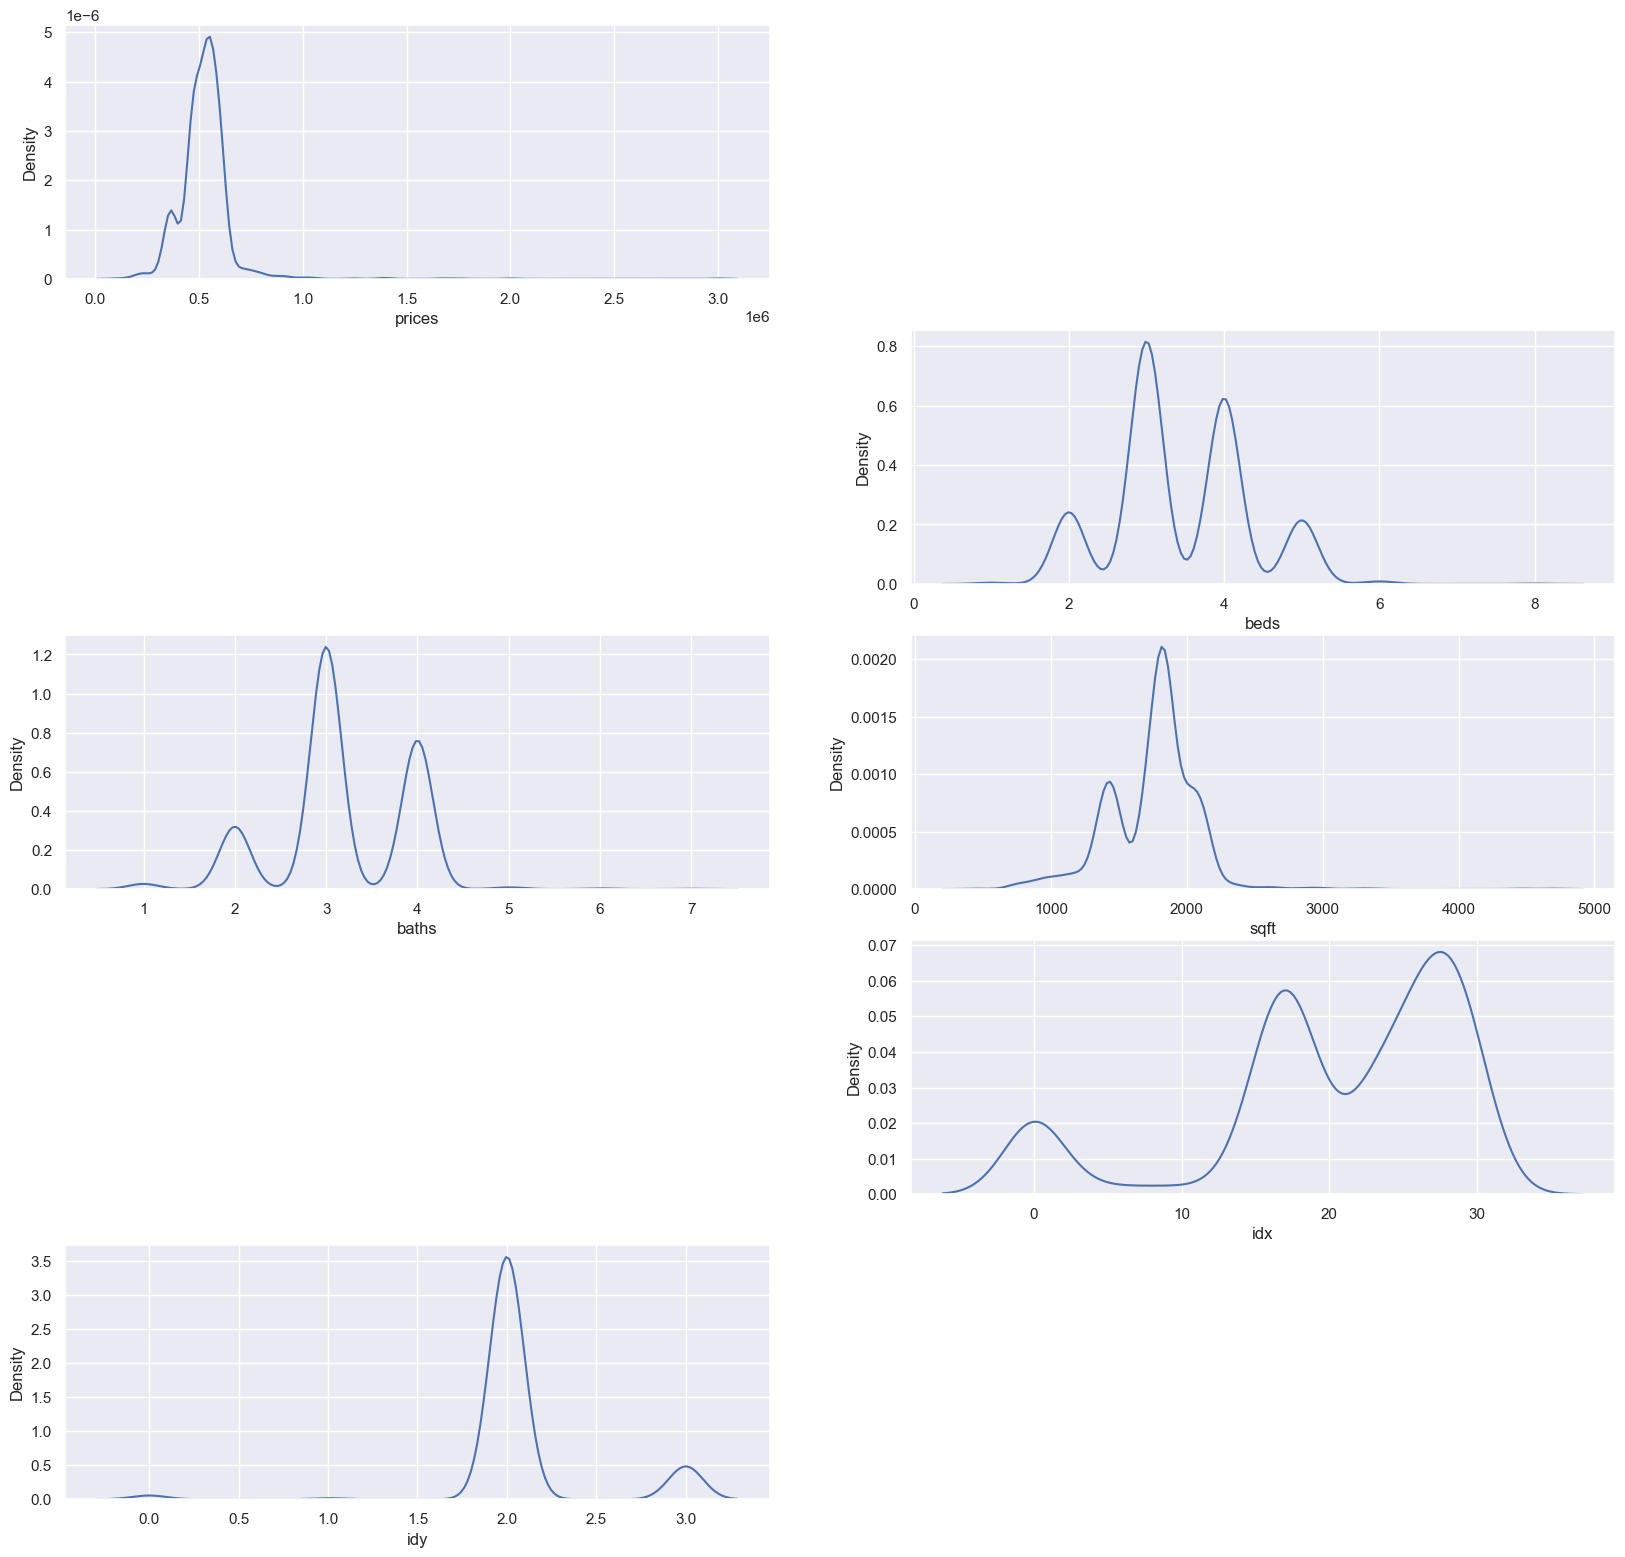

In [15]:
plt.figure(figsize=(20,35))
for i, col in enumerate(data_1.columns):
    if data_1[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(data_1[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

Since price data (target value for regression) is skewed we transform it using the logarithmic transformation.  

In [16]:
data_1['prices'] = np.log1p(data_1['prices'])


In [17]:
data_1.head()

,prices,address,zip code,beds,baths,sqft,type,idx,idy
0,14.91,548 Willow Brook Dr S Calgary AB T2J 1N7,T2J,6,6,4688,House,6,2
1,14.51,18 S Spring Glen Vw SW Calgary AB T3H 6A1,T3H,6,6,4438,House,24,2
2,14.37,85 N Slopes Poin SW Calgary AB T3H 3Y8,T3H,4,3,2533,House,24,2
3,14.33,2027 N 49th Ave SW Calgary AB T2T 2V5,T2T,5,4,2631,House,14,2
4,14.15,64 E Cranarch Hts SE Calgary AB T3M 0V6,T3M,3,4,2091,House,28,2


In [18]:
# cols = ['prices','beds','baths','sqft','idx','idy']

In [19]:
# for col in cols:
#     data_1[col] = np.log(1 + data_1[col])

In [20]:
# plt.figure(figsize=(15,20))
# for i, col in enumerate(cols):
#     ax = plt.subplot(6, 2, i+1)
#     sns.kdeplot(data_1[col], ax=ax)
# plt.show()

In [21]:
plt.figure(figsize=(12,12))
sns.heatmap(data_1.corr(), annot=True)
plt.show()

ValueError: could not convert string to float: ' 548 Willow Brook Dr S Calgary AB T2J 1N7 '

<Figure size 1200x1200 with 0 Axes>

In [22]:
data_1.describe(include='all')

,prices,address,zip code,beds,baths,sqft,type,idx,idy
count,1346.00,1346,1346,1346.00,1346.00,1346.00,1346,1346.00,1346.00
unique,NaN,176,32,NaN,NaN,NaN,4,NaN,NaN
top,NaN,529 SW Schubert Pl NW Calgary AB T3L 1X3,T3N,NaN,NaN,NaN,House,NaN,NaN
freq,NaN,131,265,NaN,NaN,NaN,1165,NaN,NaN
mean,13.15,NaN,NaN,3.44,3.18,1749.08,NaN,20.25,2.09
std,0.22,NaN,NaN,0.88,0.71,322.99,NaN,8.72,0.41
min,11.61,NaN,NaN,1.00,1.00,433.00,NaN,0.00,0.00
25%,13.06,NaN,NaN,3.00,3.00,1470.00,NaN,17.00,2.00
50%,13.20,NaN,NaN,3.00,3.00,1821.00,NaN,23.00,2.00
75%,13.30,NaN,NaN,4.00,4.00,1873.00,NaN,27.00,2.00


Removing the outliers from the square foot data.

In [23]:
q = data_1['sqft'].quantile(0.01)
data = data_1[data_1['sqft']>q]
data.describe(include='all')

,prices,address,zip code,beds,baths,sqft,type,idx,idy
count,1332.00,1332,1332,1332.00,1332.00,1332.00,1332,1332.00,1332.00
unique,NaN,162,32,NaN,NaN,NaN,4,NaN,NaN
top,NaN,61 S Redstone Cir NE Calgary AB T3N 0M8,T3N,NaN,NaN,NaN,House,NaN,NaN
freq,NaN,131,264,NaN,NaN,NaN,1161,NaN,NaN
mean,13.16,NaN,NaN,3.45,3.20,1759.56,NaN,20.35,2.10
std,0.20,NaN,NaN,0.87,0.69,307.84,NaN,8.68,0.38
min,12.27,NaN,NaN,1.00,1.00,864.00,NaN,0.00,0.00
25%,13.06,NaN,NaN,3.00,3.00,1470.00,NaN,17.00,2.00
50%,13.20,NaN,NaN,3.00,3.00,1821.00,NaN,23.00,2.00
75%,13.30,NaN,NaN,4.00,4.00,1873.00,NaN,27.00,2.00


In [24]:
q = data_1['sqft'].quantile(0.99)
data = data_1[data_1['sqft']<q]
data.describe(include='all')

,prices,address,zip code,beds,baths,sqft,type,idx,idy
count,1332.00,1332,1332,1332.00,1332.00,1332.00,1332,1332.00,1332.00
unique,NaN,162,32,NaN,NaN,NaN,4,NaN,NaN
top,NaN,5 NE Inverness Vw SE Calgary AB T2Z 3P7,T3N,NaN,NaN,NaN,House,NaN,NaN
freq,NaN,131,264,NaN,NaN,NaN,1152,NaN,NaN
mean,13.14,NaN,NaN,3.42,3.17,1735.27,NaN,20.24,2.09
std,0.20,NaN,NaN,0.87,0.69,287.06,NaN,8.74,0.41
min,11.61,NaN,NaN,1.00,1.00,433.00,NaN,0.00,0.00
25%,13.06,NaN,NaN,3.00,3.00,1470.00,NaN,17.00,2.00
50%,13.20,NaN,NaN,3.00,3.00,1821.00,NaN,23.00,2.00
75%,13.22,NaN,NaN,4.00,4.00,1873.00,NaN,27.00,2.00


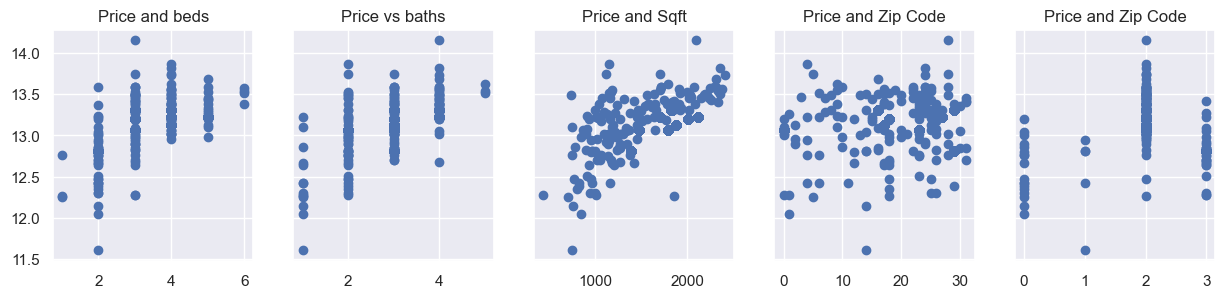

In [25]:
f, (ax1, ax2, ax3,ax4,ax5) = plt.subplots(1, 5, sharey=True, figsize =(15,3))
ax1.scatter(data['beds'],data['prices'])
ax1.set_title('Price and beds')
ax2.scatter(data['baths'],data['prices'])
ax2.set_title('Price vs baths')
ax3.scatter(data['sqft'],data['prices'])
ax3.set_title('Price and Sqft')
ax4.scatter(data['idx'],data['prices'])
ax4.set_title('Price and Zip Code')
ax5.scatter(data['idy'],data['prices'])
ax5.set_title('Price and Zip Code')
plt.show()

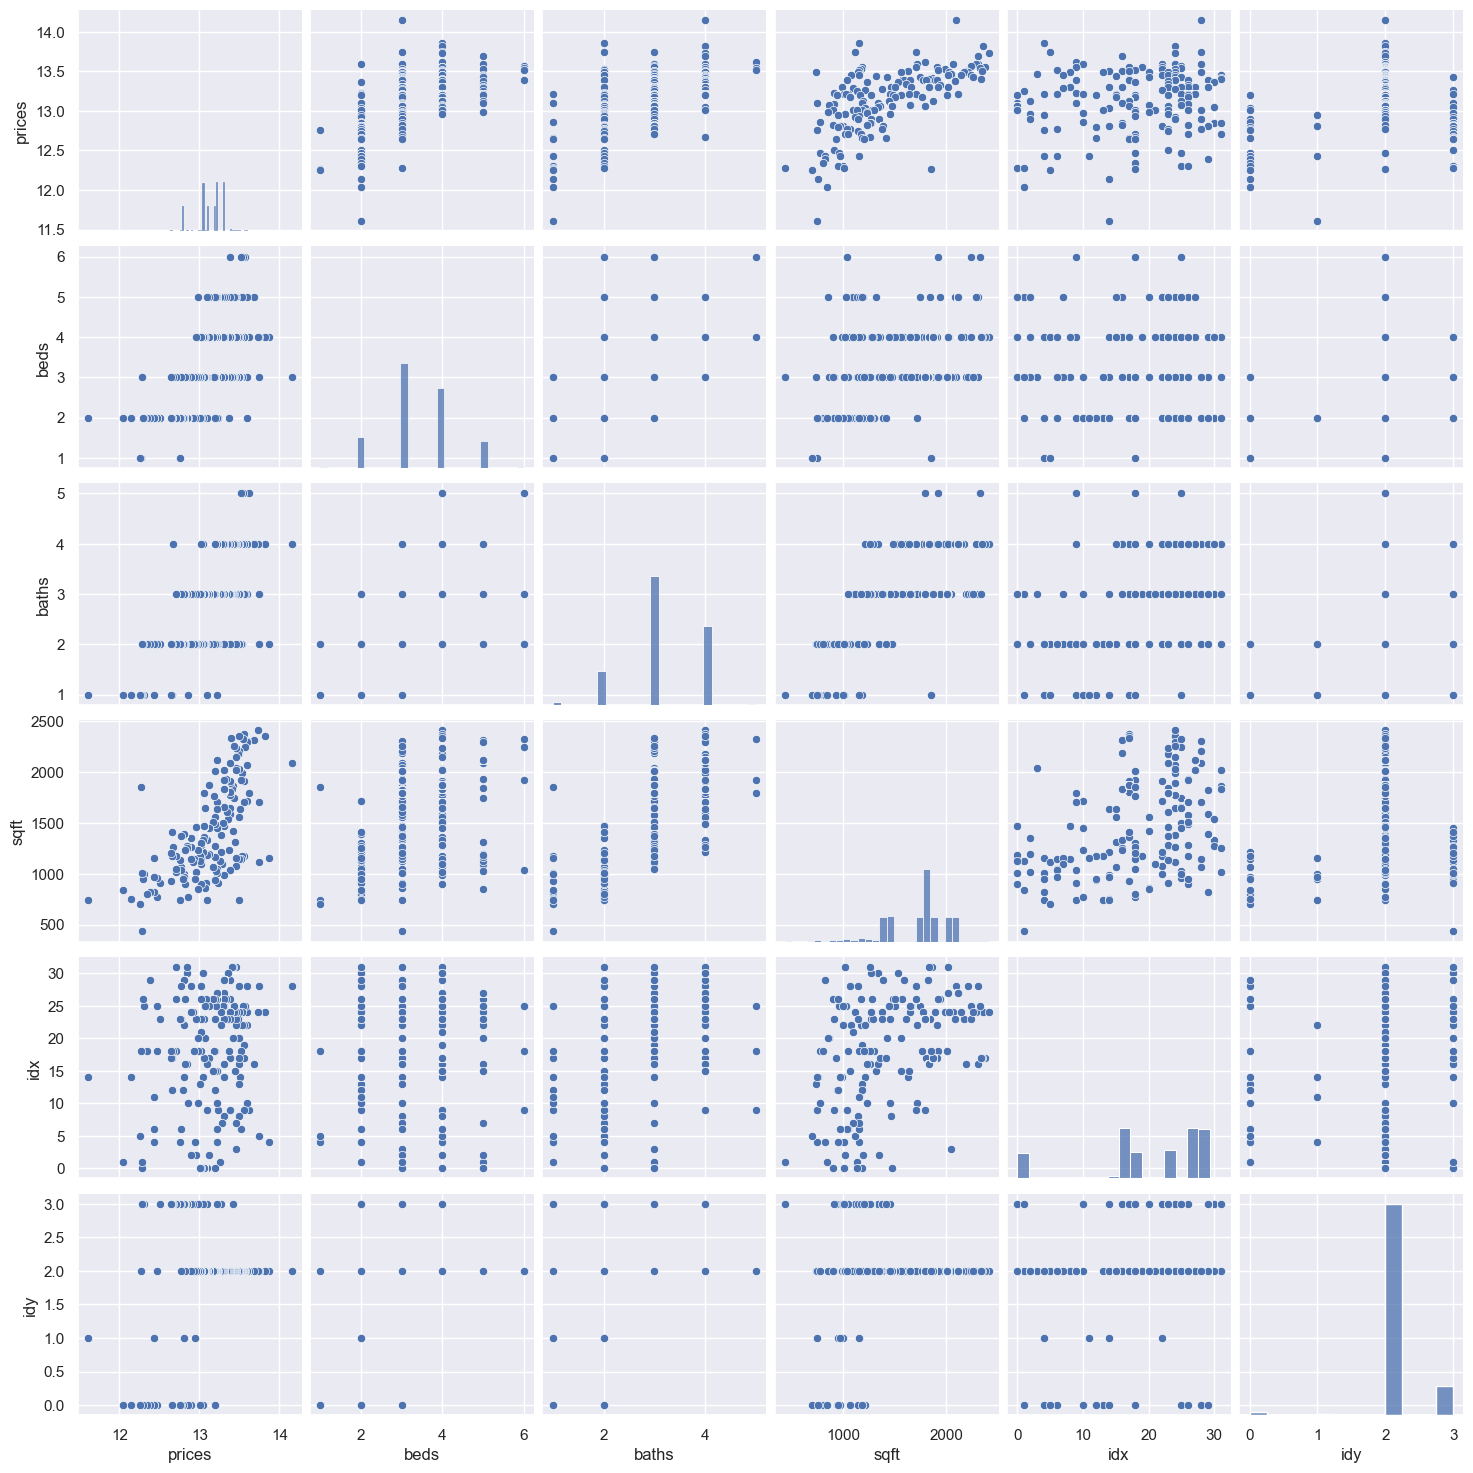

In [26]:
sns.pairplot(data)

### Linear Regression

In [27]:
X = data[['beds','baths','sqft','idx','idy']]
y = data['prices']

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [29]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [30]:
# print the intercept
print(lin_reg.intercept_)

12.499730631032527


In [31]:
pd.DataFrame(lin_reg.coef_, X.columns, columns=['coef'])

,coef
beds,0.03
baths,0.08
sqft,0.00
idx,-0.00
idy,-0.07


In [32]:
pred = lin_reg.predict(X_test)

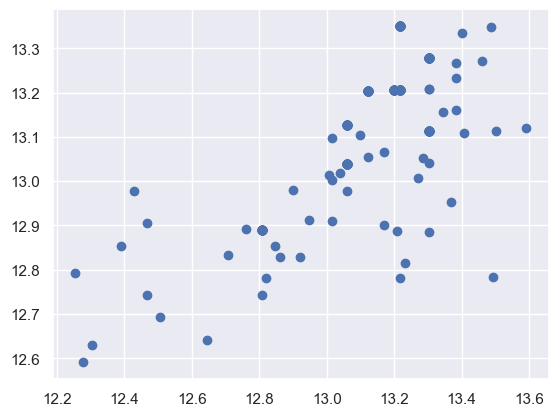

In [33]:
plt.scatter(y_test, pred)

In [34]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred})
df

,Actual,Predicted
1294,12.81,12.89
1075,13.06,13.13
1264,12.81,12.89
312,13.30,13.28
251,13.30,13.28
...,...,...
684,13.20,13.21
674,13.20,13.21
1112,13.06,13.04
1063,13.06,13.13


C:\Users\saadi\AppData\Local\Temp\ipykernel_9168\2766967375.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-pred), bins=50)


<Axes: xlabel='prices', ylabel='Density'>

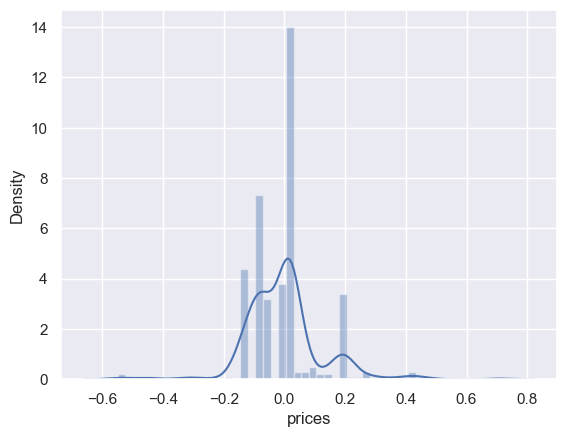

In [35]:
sns.distplot((y_test-pred), bins=50)

Visualizing the comparison of actual and predicted values.

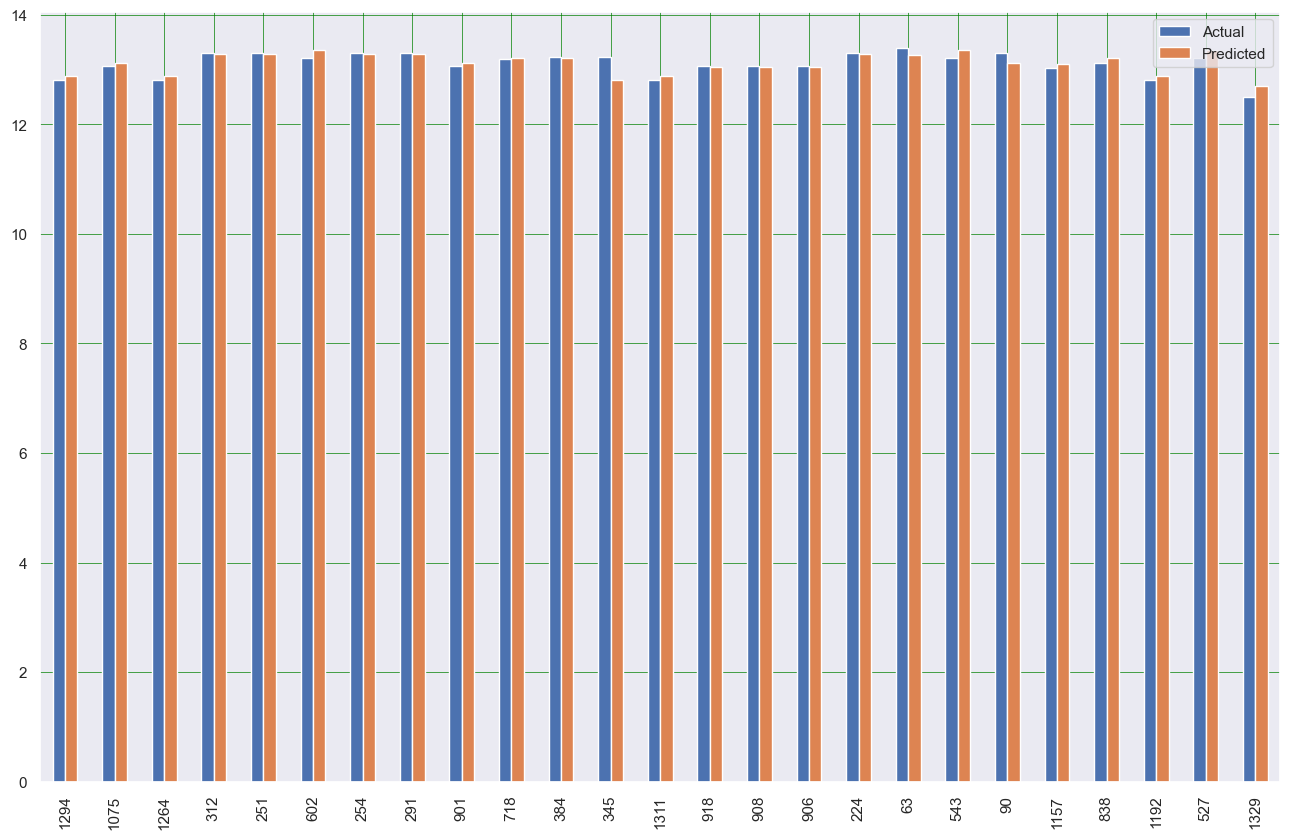

In [36]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='2.0', color='black')
plt.show()

Defining function to calculate errors of regressions.

In [38]:
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    mape = mape_score(true, predicted)
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('MAPE:', mape)
    print('R2 Square', r2_square)
    print('__________________________________')


def mape_score(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100


def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    mape = mape_score(true, predicted)
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, mape, r2_square

In [39]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score


test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)


print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)
# print('MAE:', metrics.mean_absolute_error(y_test,pred))
# print('MSE:', metrics.mean_squared_error(y_test,pred))
# print('RSME:', np.sqrt(metrics.mean_squared_error(y_test,pred)))

Test set evaluation:
_____________________________________
MAE: 0.08259691156398936
MSE: 0.01563806006630193
RMSE: 0.12505222935358623
MAPE: 0.6299701911096929
R2 Square 0.5496988694165977
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.09190985687201259
MSE: 0.020837820646474093
RMSE: 0.14435311096915818
MAPE: 0.6994014832346667
R2 Square 0.48844759175647434
__________________________________


In [40]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'MAPE', 'R2 Square'])
results_df

,Model,MAE,MSE,RMSE,MAPE,R2 Square
0,Linear Regression,0.08,0.02,0.13,0.63,0.55


C:\Users\saadi\AppData\Local\Temp\ipykernel_9168\3496611719.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - pred), bins=50);


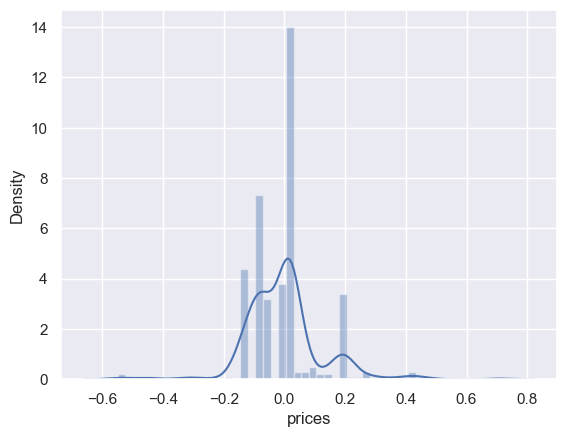

In [41]:
sns.distplot((y_test - pred), bins=50);

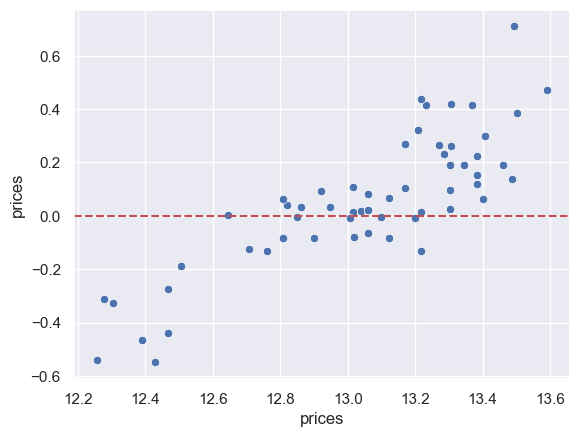

In [42]:
sns.scatterplot(x=y_test, y=y_test-pred)
plt.axhline(y=0, color='r', ls='--')

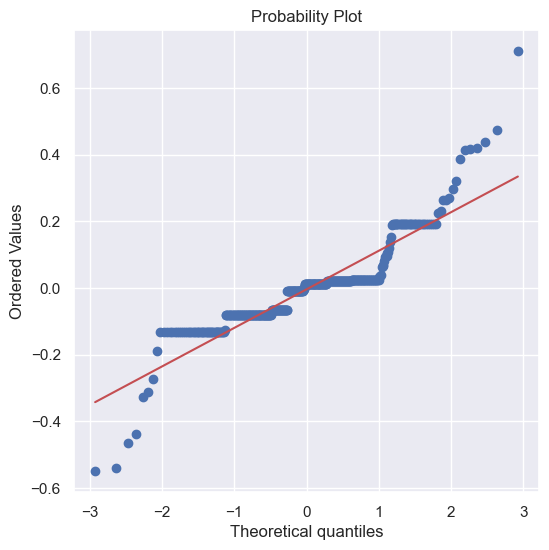

In [43]:
import scipy as sp
# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,6))
# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(y_test-pred,plot=ax)

### Random Forest Regression

In [44]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=30)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.025075645621513477
MSE: 0.008275986447664285
RMSE: 0.09097244883844935
MAPE: 0.19318934635718926
R2 Square 0.7616912815096109
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.00931434467888489
MSE: 0.001566654726975213
RMSE: 0.03958098946432761
MAPE: 0.0715286208024345
R2 Square 0.9615398360477836
__________________________________


In [46]:
import pandas as pd

# Create an empty DataFrame
results_df = pd.DataFrame(columns=['Model', 'MAE', 'MSE', 'RMSE', 'MAPE', 'R2 Square'])

# Your code to create results_df_2
results_df_2 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_test, test_pred)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'MAPE', 'R2 Square'])

# Append results_df_2 to results_df
results_df = pd.concat([results_df, results_df_2], ignore_index=True)

# Now results_df contains the combined data


C:\Users\saadi\AppData\Local\Temp\ipykernel_9168\1671396298.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, results_df_2], ignore_index=True)


### Lasso Regression

In [47]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1, 
              precompute=True, 
#               warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.11372966561418768
MSE: 0.019593106575551224
RMSE: 0.13997537846189673
MAPE: 0.8674060721481549
R2 Square 0.43581249814842205
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.12124078578612345
MSE: 0.02525549517879004
RMSE: 0.1589197759210289
MAPE: 0.9236726908365868
R2 Square 0.3799970928207952
__________________________________


In [49]:
import pandas as pd

# Create an empty DataFrame
results_df = pd.DataFrame(columns=['Model', 'MAE', 'MSE', 'RMSE', 'MAPE', 'R2 Square'])

# Your code to create results_df_2
results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'MAPE', 'R2 Square'])

# Concatenate results_df_2 to results_df
results_df = pd.concat([results_df, results_df_2], ignore_index=True)

# Now results_df contains the combined data


C:\Users\saadi\AppData\Local\Temp\ipykernel_9168\967827024.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, results_df_2], ignore_index=True)


### Predictor Function

In [50]:
pickle.dump(lin_reg, open('model.pkl','wb'))

In [51]:
model = pickle.load(open('model.pkl','rb'))
print(np.exp(model.predict([[3,2,1810,2,3]])).round(decimals=2))

[469301.87]


C:\Users\saadi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
